In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

import math

from scipy import stats

from sklearn import preprocessing

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import metrics
import scipy.optimize as opt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
mydata = pd.read_csv('data/ex2data2.txt',names=["Test1", "Test2","QA"])

In [3]:
mydata

Test1     Test2  QA
0    0.051267  0.699560   1
1   -0.092742  0.684940   1
2   -0.213710  0.692250   1
3   -0.375000  0.502190   1
4   -0.513250  0.465640   1
..        ...       ...  ..
113 -0.720620  0.538740   0
114 -0.593890  0.494880   0
115 -0.484450  0.999270   0
116 -0.006336  0.999270   0
117  0.632650 -0.030612   0

[118 rows x 3 columns]

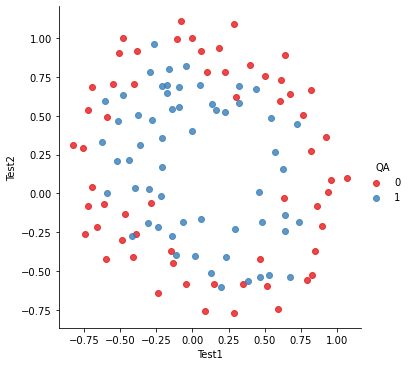

In [4]:
sns.lmplot(x="Test1",y="Test2",hue="QA",data=mydata,fit_reg=False,palette="Set1")

===================================================================================================
# Feature Mapping
# In this problem we have two features (Test1 and Test 2) and one target (QA). We create more features to 28-dimention. X Up to degree=6

In [5]:
x1=np.array(mydata["Test1"])
x2=np.array(mydata["Test2"])

In [6]:
def mapFeature(X1, X2, degrees=6):
    
    m = len(np.atleast_1d(X1))
    X = np.ones((m, 1))
    for ii in range(1, degrees+1):
        for jj in range(0,ii+1):
            X = np.hstack((X, (X1**(ii-jj) * X2**jj).reshape(m,1)))
    
    return X

In [7]:
X=mapFeature(x1,x2, degrees=6)
X.shape

(118, 28)

In [8]:
X

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [9]:
y=np.array(mydata["QA"])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [10]:
y.shape

(118,)

========================================================================================================
# Logistic Regression Hyphothesis

# $h_{\theta}(x)=g(\theta^T x)$

.
# Where g is sigmoind function

#  $g(z)=\frac{1}{1+e^{-z}}$

In [11]:
def sigmoid(z):
    return  1. / (1. + np.exp(-z))

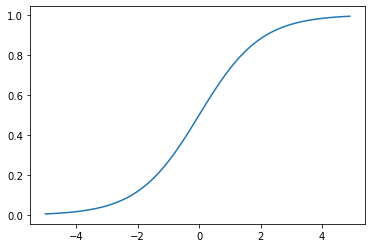

In [12]:
z = np.arange(-5,5,0.1)
plt.plot(z,sigmoid(z))

================================================================================================
# Cost Function
# $J(\theta)=\frac{1}{m}{\sum\limits_{i=1}^{m}}(-y^{(i)}log(h_{\theta}(x^{(i)}))-(1-y^{(i)})log(1-h_{\theta}(x^{(i)})))+\frac{\lambda}{2m}\sum\limits_{i=1}^{m}\theta_j^2$

In [13]:
def hypothesis(theta,X):
    htheta=sigmoid(np.dot(theta,X))
    return htheta

# Note that the first $\theta$ in the second term above should be zero. Therefore we need to put lamarray[0]=0

In [14]:
def computecost(theta,X,y,lambda_):
    m=len(y)
    eps = 1e-15
    lamarray = np.ones(len(theta)) * lambda_
    lamarray[0] = 0.0
    htheta=sigmoid(np.dot(X,theta))
    J = (1./m) * np.sum(-np.dot(y,(np.log(htheta))) - np.dot((1. - y),(np.log(1. - htheta))))+ (1/(2.0 * m)) * np.sum(lamarray*np.square(theta))
    return J

# Check your cosfunction: For $\lambda_=1$ and $\theta$ zeros the cost function should be 0.69 and for $\theta$ ones shoudl be 2.13.

In [15]:
#test
lambda_=1.
int_theta = np.zeros(X.shape[1])
computecost(int_theta,X,y,lambda_)
#should give 0.69

0.6931471805599453

In [16]:
#test
lambda_=1.
test_theta = np.ones(X.shape[1])
computecost(test_theta,X,y,lambda_)
# should give 2.13

2.1348483146658572

================================================================================================
# Gradient Descent
#  $\theta_j = \theta_j-\frac{\alpha}{m}{\sum\limits_{i=1}^{m}}(h_{\theta}(x^{(i)})-y^i)x^{(i)}+\frac{\lambda}{m}\theta_j$

In [25]:
def gradientdescent(theta,X,y,lambda_):
    m=len(y)
    lamarray = np.ones(len(theta)) * lambda_
    lamarray[0] = 0.0
    htheta=sigmoid(np.dot(X,theta))
    descent = (1/m)*np.dot(X.T,(htheta - y))+( lamarray /m)*theta
    return descent

In [26]:
#check
theta = np.ones(X.shape[1])
htheta=sigmoid(np.dot(X,theta))
htheta.shape

(118,)

# Check your gradient descent for $\theta$ zeros and ones

In [27]:
#test
lambda_=1.0
theta = np.zeros(X.shape[1])
gradientdescent(theta,X,y,lambda_)
#correct answer shoudl start with 8.4 and end with 3.87

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [28]:
#test
lambda_=1.0
theta = np.ones(X.shape[1])
gradientdescent(theta,X,y,lambda_)
#correct answer shoudl start with 0.34 and end with 0.106

array([0.34604507, 0.08508073, 0.11852457, 0.1505916 , 0.01591449,
       0.16811439, 0.06712094, 0.03217053, 0.02604321, 0.10719727,
       0.09725885, 0.01098433, 0.04195657, 0.00957212, 0.12367776,
       0.05895534, 0.01870409, 0.01729323, 0.02352665, 0.01513039,
       0.09858123, 0.07328323, 0.01051447, 0.02270567, 0.00904832,
       0.02563548, 0.00823079, 0.10601204])

# Obtaining $\theta$ using fminunc for given $\lambda$

In [21]:
def result(X,y,lambda_):
    lamarray = np.ones(len(theta)) * lambda_
    lamarray[0] = 0.0
    test_theta = np.zeros(X.shape[1])
    R=opt.fmin_tnc(func=computecost,x0 = test_theta.flatten(),fprime=gradientdescent,args=(X,y,lambda_))
    return(R)

In [22]:
#test
lambda_=1.0
lamarray = np.ones(len(theta)) * lambda_
lamarray[0] = 0.0
ret=result(X,y,lamarray)[0]
ret

array([ 1.27271026,  0.62529964,  1.18111686, -2.019874  , -0.91743188,
       -1.43166928,  0.12393227, -0.36553118, -0.35725406, -0.17516292,
       -1.45817009, -0.05098418, -0.61558558, -0.27469165, -1.192713  ,
       -0.2421784 , -0.20603303, -0.04466177, -0.27778946, -0.29539514,
       -0.45645982, -1.04319154,  0.02779373, -0.29244863,  0.01555759,
       -0.32742403, -0.14389149, -0.92467488])

# Plotting Descision Boundary
###  Note the the decision boundary is where $\theta^TX=0$, or $sigmoid(\theta^TX)=0.5$. 

In [23]:
def plotData2(X, y):
    
    # get indices of 1 and 0 y values
    pos = y == 1
    neg = y == 0
    
    # plot positive (i.e., accepted) points
    plt.plot(X[pos,0], X[pos,1], '+', color='k', ms=7,
             mew=2, label=r'Accepted')
    
    # plot negative (i.e., not accepted) points
    plt.plot(X[neg,0], X[neg,1], 'o', color='y', ms=7,
            label=r'Rejected')
    
    # axes labels
    plt.xlabel(r'Microchip test 1')
    plt.ylabel(r'Microchip test 2')
    
    # add legend
    plt.legend(loc='best', fontsize=8, numpoints=1)

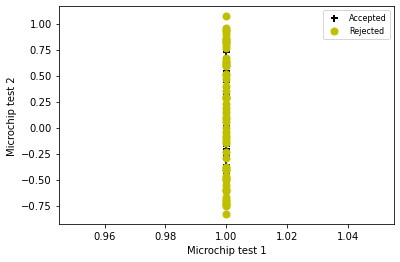

In [24]:
plotData2(X, y)

In [25]:
def plotDecisionBoundary2(theta, X, y,lamarray):
    ret=result(X,y,lambda_)[0]

    # plot the data
    plotData2(X[:,1:3], y)

    u = np.linspace(-1, 1.5,50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = np.dot(mapFeature(u[i], v[j]), ret)

    plt.contour(u, v, z.T, 0, labels='Decision Boundary', colors='b')
    

Text(0.5, 1.0, 'lambda=1')

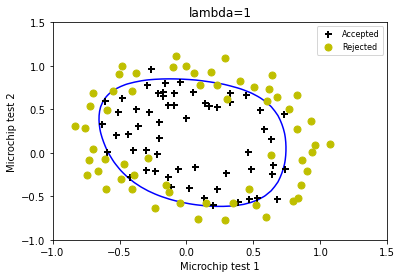

In [26]:
lambda_=1.0
lamarray = np.ones(len(theta)) * lambda_
lamarray[0] = 0.0
plotDecisionBoundary2(ret, X, y,lamarray)
plt.title('lambda=1')

Text(0.5, 1.0, 'lambda=100')

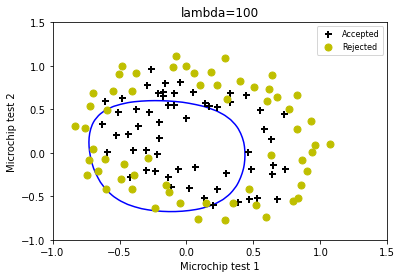

In [27]:
# if lambda is set to too high a value, you will not get a good fit and the decision
# boundary will not follow the data so well, thus underfitting the data
# regularization helps to overcome overfitting
lambda_=100.
lamarray = np.ones(len(theta)) *lambda_
lamarray[0] = 0.0
plotDecisionBoundary2(ret, X, y,lamarray)
plt.title('lambda=100')

Text(0.5, 1.0, 'lambda=0')

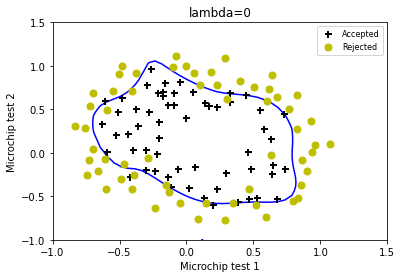

In [28]:
# small lambda gives overfitting
lambda_=0.
plotDecisionBoundary2(ret, X, y,lambda_)
plt.title('lambda=0')

### or decision boundary is where  $sigmoid(\theta^TX)=0.5$. 

In [29]:
def plotDecisionBoundary2(theta, X, y,lamarray):
    ret=result(X,y,lambda_)[0]

    # plot the data
    plotData2(X[:,1:3], y)

    u = np.linspace(-1, 1.5,50)
    v = np.linspace(-1, 1.5, 50)

    z = np.zeros((len(u), len(v)))
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = sigmoid(np.dot(mapFeature(u[i], v[j]), ret))-0.5

    plt.contour(u, v, z.T, 0, labels='Decision Boundary', colors='b')

Text(0.5, 1.0, 'lambda=0')

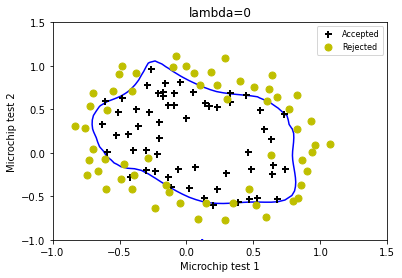

In [30]:
# small lambda gives overfitting
lambda_=0.
plotDecisionBoundary2(ret, X, y,lambda_)
plt.title('lambda=0')